# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

#loading the file path
file_path = '/content/drive/My Drive/Foodhub Data/foodhub_order.csv'
df = pd.read_csv(file_path)

#format floats
pd.set_option('display.float_format', '{:.2f}'.format)

# Preview first rows
df.head()


Mounted at /content/drive


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

# **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# using shape to determine the number of rows and cols

rows = df.shape[0]
cols = df.shape[1]

print(f"The dataset has {rows} rows and {cols} columns")



The dataset has 1898 rows and 9 columns


#### Observations: We have a record of 1898 orders for the foodhub app , each order is described using 8 different attributes which are the customer id , the resutrant name , the cuisine type , the cost of the order , the day of the week for the order , the rating for the order , the time it took to prepare the order , and the time it took for delivery, so each row represents an order described through these attributes.


# **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# We will use info to have a description of the datatypes of each coloumn and understand how many null values in each
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: We have 3 types of data for the dataset above , objects for string data ( resturant_name , cuisine_type , day_of_the_week, ) and also the (rating) because it includes the word 'not given' , float for the order price because it could have fractions , and integers for numeric values which are (order_id , customer_id ,  food_preperation_time , delivery_time)


#**Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# we want to print the sum of the null values for each variables
print(df.isna().sum())


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


Observation : We can ntoice that there are no missing values in the dataset but we have "Not given" As an object for the ratings

In [ ]:

# converting the ratings to numeric so we can convert the objects to NaN with error coerce where it assigns NaN for uncovertible content
df['rating'] = pd.to_numeric(df['rating'], errors= 'coerce' )
# converting Not given with NaN to be able to count them
df['rating'] = df['rating'].replace('Not given', np.nan )
# summing the NaN values
print(df.isna().sum())


order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64


We can see here that there are 736 ratings now being treated as NaN after converting them from "Not given" to NaN, also i created a version where its numeric so we can use it for possible linear combination with other numrical values , so im treating it as categorical but i will use it once for the heatmap

In [ ]:
# calculate the percetange of missing ratings to have a sense
missing_percentage = df['rating'].isna().mean() * 100
print(f"The percentage of missing ratings is : {missing_percentage:.2f}%")


The percentage of missing ratings is : 38.78%


Observation : We can see that there are 38.78% of the ratings that are "Not given"

In [ ]:
#dataframe of missing rating counts per restaurant
count_missing = df[df['rating'].isna()].groupby('restaurant_name').size()
# filtering resturants with less 5 or more missing ratings
filtered = count_missing[count_missing >= 5].sort_values(ascending=False)
# print values
filtered


,0
restaurant_name,
Shake Shack,86
The Meatball Shop,48
Blue Ribbon Sushi,46
Blue Ribbon Fried Chicken,32
Parm,29
Han Dynasty,23
Blue Ribbon Sushi Bar & Grill,22
RedFarm Hudson,21
TAO,21


Observation :We noticed that out of the 736 there are 567 up to 77% come from a small group of resturants with 5 or more missing or "Not given" and this shows that the missing values are not randomly distributed , they are clustrered around a small group of resturants , and because of this imbalance we are choosing to not impute the missing ratings with the mean , median or mode or even averages per resturants because imputing them could distort the natural variation in customer feedback. We chose to retain them as missing values to preserve the integrity of the data and avoid introducing bias."  

# **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
#Converting the ratings back to categorical values for the analysis
df['rating'] = df['rating'].fillna('Not given')
df['rating'] = df['rating'].astype('category')


In [ ]:
# Describing the data statsically using desribe
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1898.00,1898.00,1898.00,1898.00,1898.00
mean,1477495.50,171168.48,16.50,27.37,24.16
std,548.05,113698.14,7.48,4.63,4.97
min,1476547.00,1311.00,4.47,20.00,15.00
25%,1477021.25,77787.75,12.08,23.00,20.00
50%,1477495.50,128600.00,14.14,27.00,25.00
75%,1477969.75,270525.00,22.30,31.00,28.00
max,1478444.00,405334.00,35.41,35.00,33.00


In [ ]:
# Checking the min mean and max for the time prepeartion , taking first decimals from the mean
print('min meal time preperation :', df['food_preparation_time'].min(),'minutes')
print('Mean meal preparation time:', round(df['food_preparation_time'].mean(), 2), 'minutes')

print('max meal time preperation :', df['food_preparation_time'].max(),'minutes')

min meal time preperation : 20 minutes
Mean meal preparation time: 27.37 minutes
max meal time preperation : 35 minutes


#### Observations: We can see that it takes 20-35 minutes min to max for meals with an average 27.4 minutes as a mean


# **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# converting the ratings to numeric so we can convert the objects to NaN with error coerce where it assigns NaN for uncovertible content
df['rating'] = pd.to_numeric(df['rating'], errors= 'coerce' )
# converting Not given with NaN to be able to count them
df['rating'] = df['rating'].replace('Not given', np.nan )
# summing the NaN values
# we will filter the ratings where the missing values are and sum the total
unrated_orders = df['rating'].isna().sum()

print("the number of orders that are not rated:", unrated_orders)

the number of orders that are not rated: 736


#### Observations: We can see that ther are 736 orders that their rating is not given


### Exploratory Data Analysis (EDA)

### Univariate Analysis

# **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

This analysis with the perspective of overseeing the full customer order lifecycle , from order placement to food preperation to delivey and final feedback , each stage will play a critical role in shaping the decisions we migh include from

during this analysis i will adpot a question driven exploration using the dataset to investigate the patterns related to

1. Restaurant demand optimization
2. Customer experience enhancement
3. Operational efficiency & reliability


i will begin generating series of targeted buisness questions that are based on each type of the variables (categorical , ordinal or numrical ) and i will use the univaraite visulazations to examine each variable in isolated way.
for each graph i will be writting down my observations to help answer these questions then i will extend it to the multivariate analysis to discover more hidden patterns .

finally in the conclusion i will try to synthesize insights drawn from the questions and answers  into a clear set of business recommendations that will follow that main structure restaurant demand, customer experience, and operational performance

these three ket focus areas for making sense of the data to drive decision for Foodhub .

## **1)Which restaurants are receiving the most orders?**

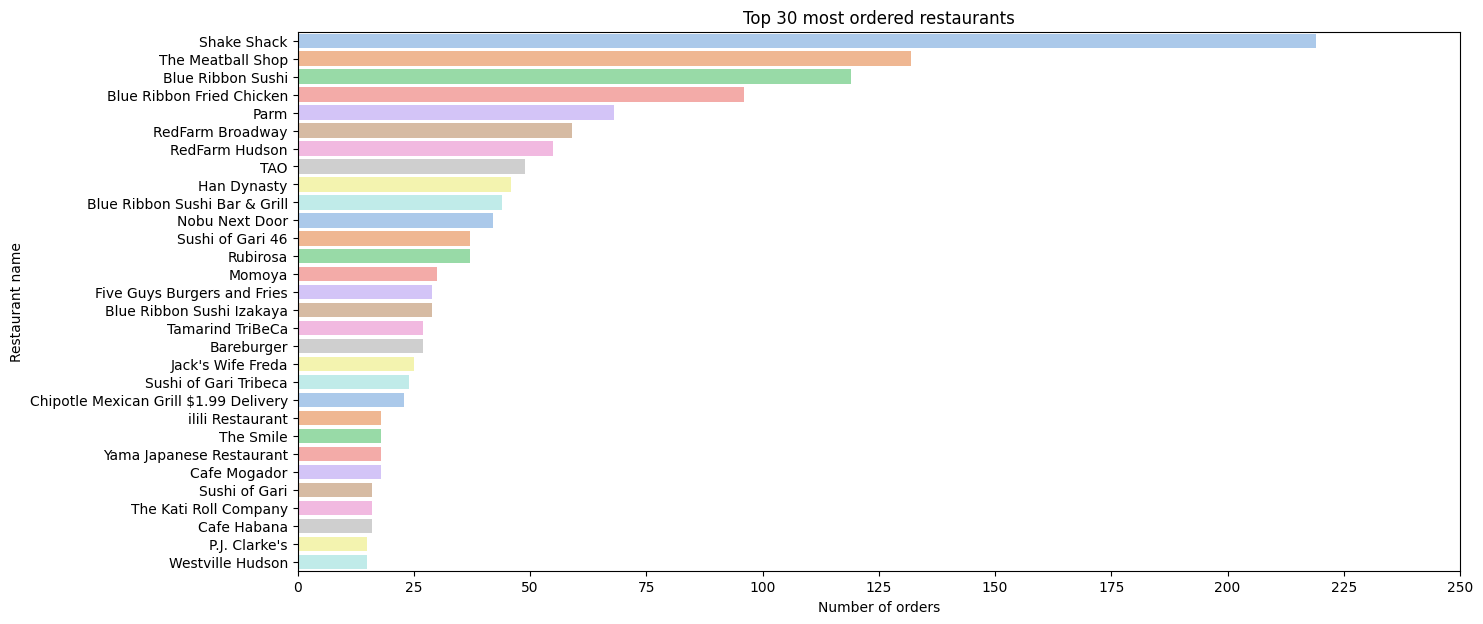

In [ ]:

# filtering the data for the highest count for the top 10 resturants
top_restaurants = df['restaurant_name'].value_counts().head(30).reset_index()
top_restaurants.columns = ['restaurant', 'count']

# ploting the resturants name and their number of orders each adding hue as a resturant to give diferent colors
plt.figure(figsize=(15, 7))
sns.barplot(data=top_restaurants, x='count',y='restaurant',hue='restaurant',palette='pastel')
plt.title('Top 30 most ordered restaurants')
plt.ylabel('Restaurant name')
plt.xlabel('Number of orders')
plt.xticks(ticks=range(0, 251, 25))


plt.show()

Observation:

We can easily notice that shake shack has the highest order volume , more than 200 which is higher than any other resturant significantly , Meatball shop and Blue ribbon Sushe/Fried Chicken show a drop in the number of orders , this shows that a small number of resturants represent a large share of the orders , this tells us that there is a strong brand or great location . From foodhub perpsective it would be great to prioritze these resturants for faster delivery time and marketing tie-ins between them , or even creating loyalty programs for them.

##**2)What cuisines are most preferred by customers?**

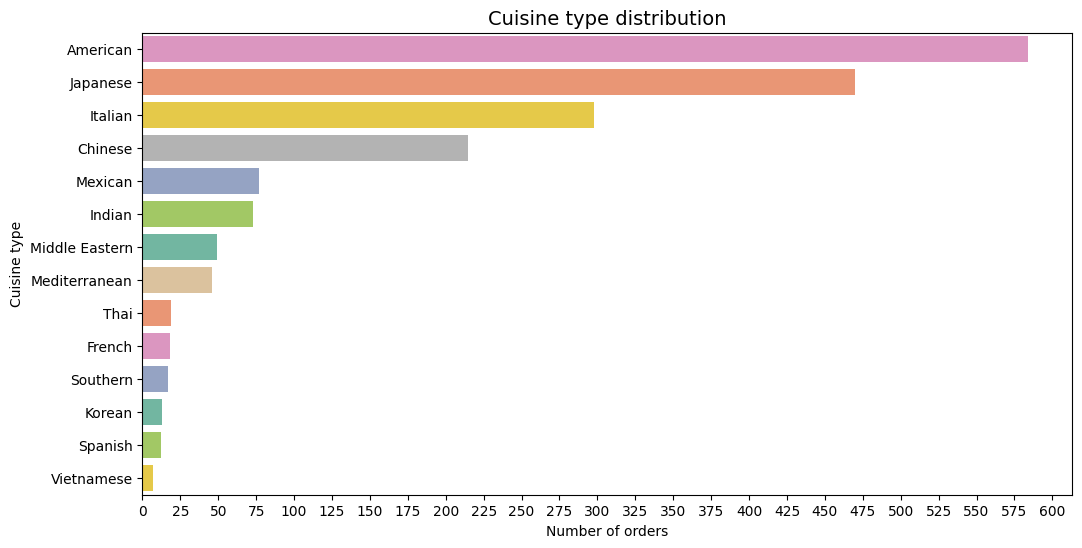

In [ ]:

# plotting the cuisine type distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df,y='cuisine_type',hue='cuisine_type',order=df['cuisine_type'].value_counts().index, palette='Set2',)
plt.title('Cuisine type distribution', fontsize=14)

plt.ylabel('Cuisine type')
plt.xlabel('Number of orders')
plt.xticks(ticks=range(0, 601, 25))

plt.show()



American food type cuisine is the most popular , almost 600 oders followed by the Japanese, Italian and Chinese , this indicates that these 4 are dominating the customer prefrences . In contrast we can see that Vietnamese,Spanish and Korean suggests that its more limited for a niche interest . these ingishts can help foodhub to promote for resturants facing underepresentation or expand with more partener resturants that are dominating the high top demand.

##**3)What is the general price range customers spend on food?**

In [ ]:

data = df['cost_of_the_order']

# we get 75 and 25 percentile
q75, q25 = np.percentile(data, [75, 25])
iqr = q75 - q25

#we calculate the number of bins using IQR equation
bin_width = 2 * iqr / (len(data) ** (1/3))
bin_count = int(np.ceil((data.max() - data.min()) / bin_width))

print(f" best bin # fit : {bin_count}")


 best bin # fit : 19


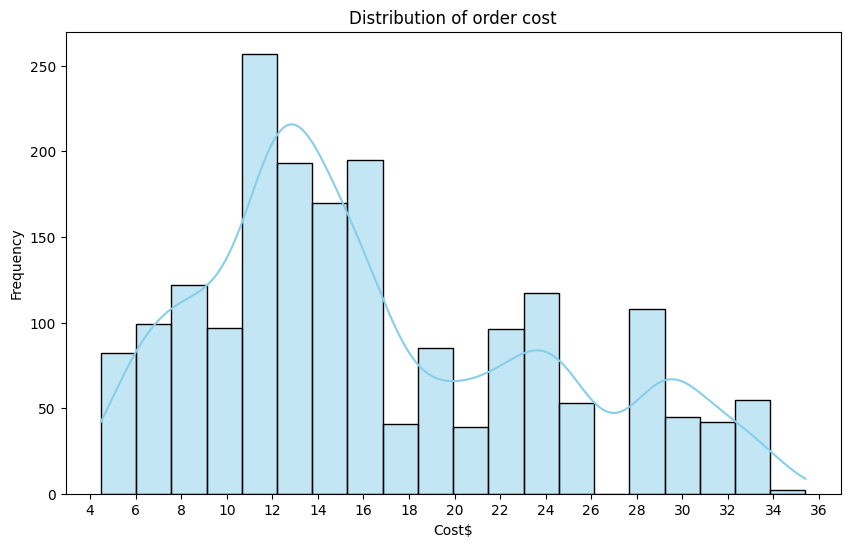

In [ ]:

#plotting a hisogram using almost 20 bins for graph
plt.figure(figsize=(10, 6))
sns.histplot(df['cost_of_the_order'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of order cost')

plt.xlabel('Cost$')
plt.ylabel('Frequency')

plt.xticks(ticks=range(4, 38, 2))


plt.show()


Observation:

The histogram relatively shows that the majority of the orders fall between 8-16 dollars with a peak between 12-14, this shows that customers are more into buying a mid-range price for the meals , so from foodhub perspective it would me smart to make this pricing range for promotions and bundled deals, histo shows a bit of right skewed behviour of the cost

##**4)Is the order cost range consistent or variable?**

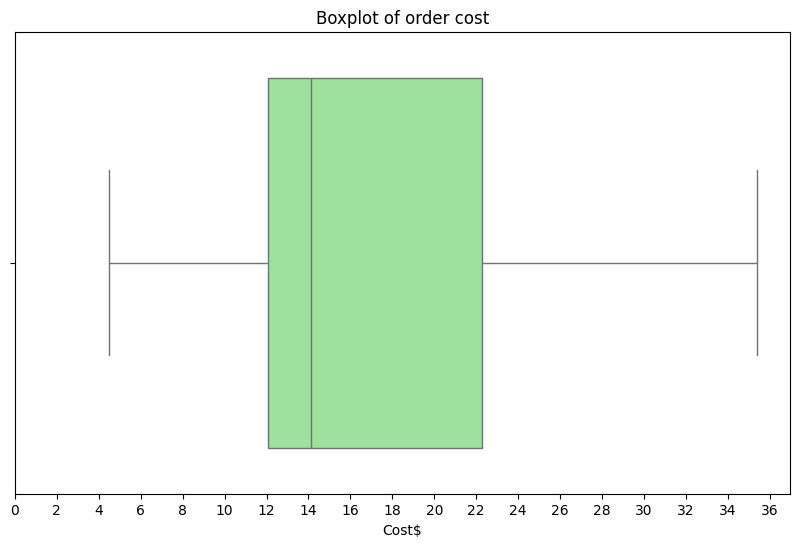

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['cost_of_the_order'], color='lightgreen')
plt.title('Boxplot of order cost')
plt.xlabel('Cost$')

plt.xticks(ticks=range(0, 38, 2))


plt.show()



Observation:

The boxplot shows that the IQR for orders is between 12 and 22 dollars , this means that 50% of all orders are within this range , the median is nearly 14 dollars , which suggest that customers spend within these ranges , for the whiskers they are between 4 and 45 dollars , there are no strong outliners and this shows that the orders cost isn't affected by extreme pricing , this shows consistent spread for the prices , there is a slight effect to be a bit right skewed by the values above 30.

##**5)Do customers order more on weekdays or weekends?**

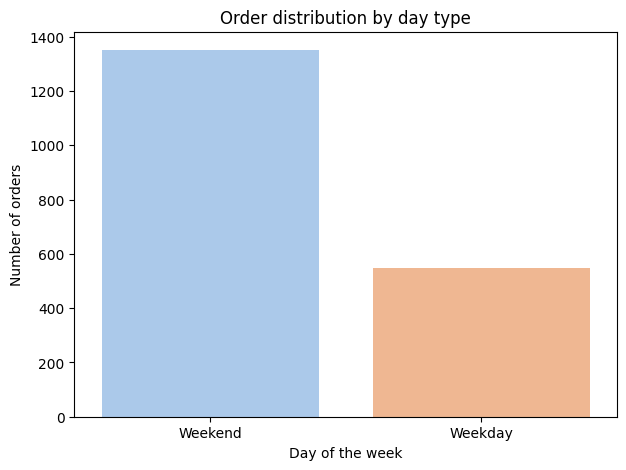

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='day_of_the_week', hue='day_of_the_week', palette='pastel')
plt.title('Order distribution by day type')

plt.xlabel('Day of the week')
plt.ylabel('Number of orders')

plt.show()




The count plot shows that the number of orders placed on weekends is more than the double of weekdays , this shows that the there is high demand for orders in the weekend which is the cuonsumer behavior tendecy , from foodhub perspective it would suggest that they optimize the staffing and delivery logistics around weekends and laso promotional offers to handle the demand efficiently and support customer satisfaction

##**6)How do customers rate their orders overall?**

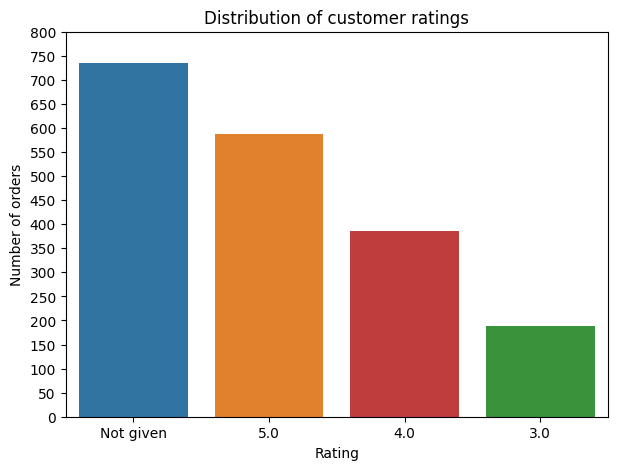

In [ ]:
#replacing NaN with "Not given"
df['rating'] = df['rating'].fillna('Not given')
#plotting countplot
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='rating',hue='rating', order=df['rating'].value_counts().index,legend=False)
plt.title('Distribution of customer ratings')
plt.ylabel('Number of orders')
plt.xlabel('Rating')

plt.yticks(ticks=range(0, 801, 50))

plt.show()


Observation:A significant portion of customers (over 700 orders) chose not to provide a rating, indicating a potential gap in feedback collection. Among those who did rate, 5.0 is the most common score, followed by 4.0 and then 3.0, suggesting that customer satisfaction is generally high. However, the absence of ratings on a large share of orders could mask service issues or limit actionable insights. Encouraging users to leave feedback—perhaps through in-app nudges or small incentives—could improve data quality and help identify areas needing improvement.

##**7)What is the common range of food prep times?**

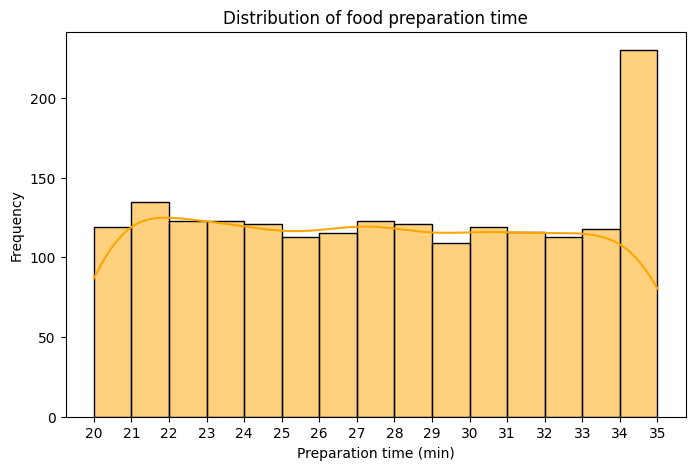

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['food_preparation_time'], bins=15, kde=True, color='orange')
plt.title('Distribution of food preparation time')

plt.xlabel('Preparation time (min)')
plt.ylabel('Frequency')

plt.xticks(ticks=range(20, 36, 1))

plt.show()





The dsitribtion of the food prep time is ranging between 20-35 minutes in a uniform way , with a slight increase for the 35 minutes , showing that many resturants tend to hit this limit for the prep time , also maybe can show that this peak can be a reason for delaying orders in certain times because of making multiple orders at the same time which does this delay

##**8)Is prep time stable across restaurants?**

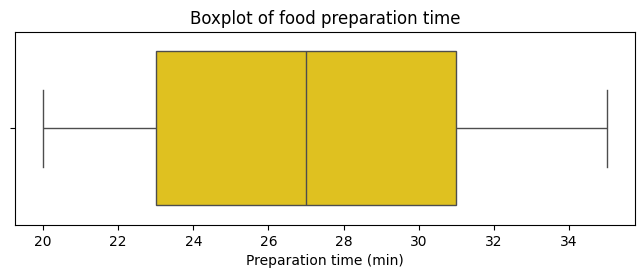

In [ ]:
plt.figure(figsize=(8, 2.5))
sns.boxplot(x=df['food_preparation_time'], color='gold')
plt.title('Boxplot of food preparation time')

plt.xlabel('Preparation time (min)')

plt.show()



This boxplot shows that the IQR is tightly between 23 to 31 minutes with a median of almost 27 miunutes , no outliners and this suggests that the prep process is consistent in terms of time , this can benefical to maintain predictable time of delivery



##**9)What is the typical delivery time for orders?**

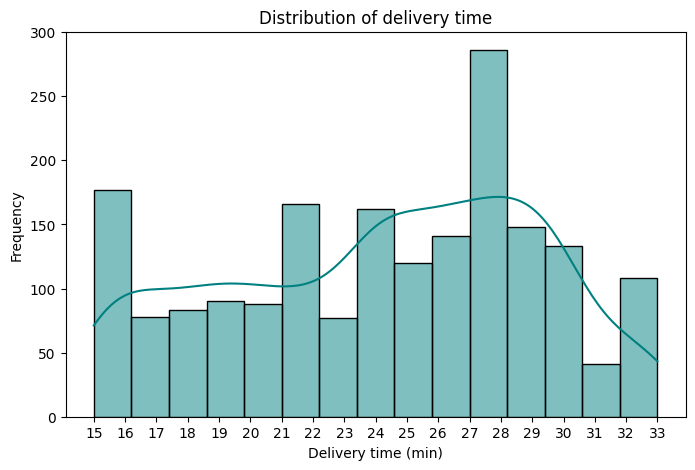

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['delivery_time'], bins=15, kde=True, color='teal')
plt.title('Distribution of delivery time')

plt.ylabel('Frequency')
plt.xlabel('Delivery time (min)')
plt.xticks(ticks=range(15, 34, 1))


plt.show()



We can see that the delivery time is taking s slight moderate distibrution with a peak around 27-28 minutes , this suggests that most deliveries are consitent occur in thi range , the data is spread in a moderate way and they are all ranging between 15 to 33 minutes , showing a stable performance and from the foodhub perspective it shows taht they have logistics operating on a predictable time frame and can push towards imporving the delivery relaibility

##**10)Is delivery time consistent across orders?**

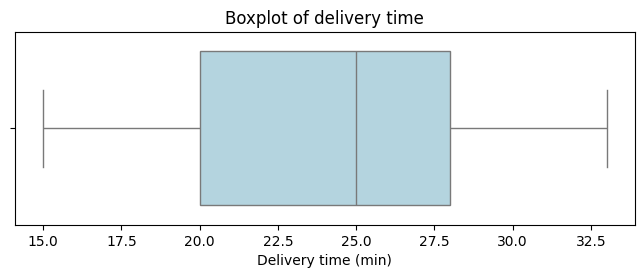

In [ ]:
plt.figure(figsize=(8, 2.5))
sns.boxplot(x=df['delivery_time'], color='lightblue')
plt.title('Boxplot of delivery time')
plt.xlabel('Delivery time (min)')

plt.show()



The boxplot shows that deliveries are completed within 20-28 minutes IQR with median of 25 minutes , the distribution fo the data is symmetric with no outliners , indicating a stable and predicatable delivery process , this shows that foodhub's logistics can reduce the upper range beyond 30 mintues is achievable.

# **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# We will calculate the counts of each resurtant orders for the top 5 resurants
top_5_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_5_restaurants)


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:
The top 5 restaurants by the number of orders are  respectively (Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm) indicating these are the most popular and high-demand resurtants among customers.

# **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# We filter the cuisine type based on weekends and count them
weekend_data = df[df['day_of_the_week'] == 'Weekend']
weekend_data['cuisine_type'].value_counts()


,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Middle Eastern,32
Mediterranean,32
Thai,15


Observation : On weekends, American cuisine is the most popular with 415 orders, followed by Japanese (335) and Italian (207)

# **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# we filter and count the orders that are more than 20 dollars and divide by the total number of orders
percentage = (df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0]) * 100
print(percentage)


29.24130663856691


#### Observations: Approximately 29.2% of the orders cost more than $20, indicating that almost one-third of customers tend to buy orders higher than 20 dollars


#**Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# We calculate the mean of the delivery time
mean_delivery = df['delivery_time'].mean()
print(mean_delivery)


24.161749209694417


#### Observations: The mean delivery time is approximately 24.16 minutes, indicating that, on average, customers wait around 24 minutes for their orders to arrive.

# **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

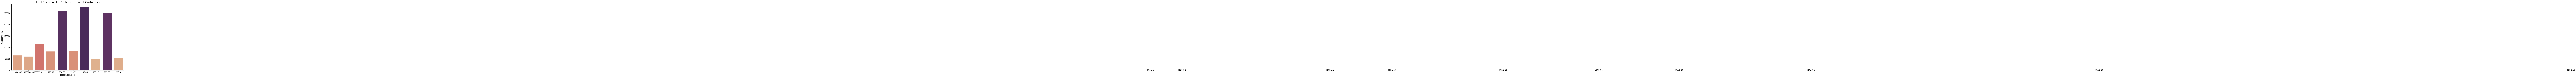

In [ ]:
# Step 1: Top 10 frequent customer IDs
top_freq_ids = df['customer_id'].value_counts().head(10).index

# Step 2: Their total spend
top_freq_spend = df[df['customer_id'].isin(top_freq_ids)].groupby('customer_id')['cost_of_the_order'].sum().sort_values(ascending=False)

# Step 3: Plot (assign hue explicitly to avoid warning)
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x=top_freq_spend.values,
    y=top_freq_spend.index,
    hue=top_freq_spend.index,  # Add hue to satisfy deprecation warning
    dodge=False,
    palette='flare',
    legend=False  # Hide redundant legend
)

plt.title("Total Spend of Top 10 Most Frequent Customers", fontsize=18)
plt.xlabel("Total Spend ($)", fontsize=14)
plt.ylabel("Customer ID", fontsize=14)

# Annotate the bars
for i, value in enumerate(top_freq_spend.values):
    ax.text(value + 1, i, f"${value:.2f}", va='center', fontsize=12, weight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplots_adjust(left=0.2, right=0.95)  # Manual spacing
plt.show()


In [ ]:
# We take the 3 highest counts for customers who bought more orders
top_customers = df['customer_id'].value_counts().head(3)
print(top_customers)


customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations: The top 3 most frequent customers placed 13, 10, and 9 orders respectively which makes them the most loyal and eligible for the 20% discount vouchers


### Multivariate Analysis

# **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


##**11)Do some cuisines receive better ratings than others?**

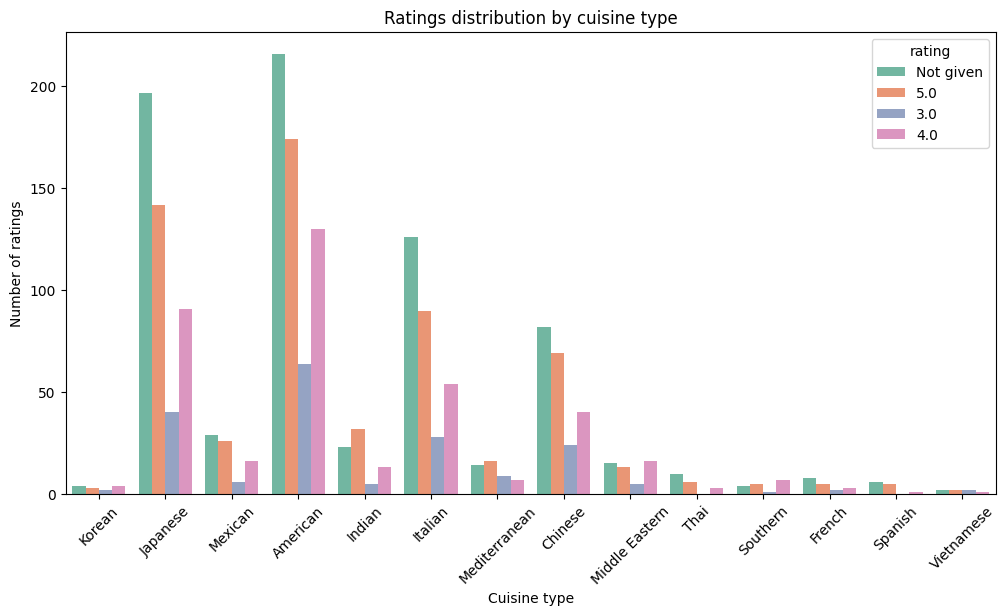

In [ ]:
# plotting the number of ratings and their categories for. different cuisine types using bar graph
plt.figure(figsize=(12, 6))
sns.countplot( data=df, x='cuisine_type', hue='rating',palette='Set2'
)
plt.title('Ratings distribution by cuisine type')
plt.xlabel('Cuisine type')
plt.ylabel('Number of ratings')
plt.xticks(rotation=45)

plt.show()


Observation:
We can notice that for most cuisines types the ratings provided are 5 dominating in the japanese , american italian and chinese , but there is a significat number of orders across all cusine types marked as "Not given" , this indicates a challenge in collecting customer feedback , we can notice that american , japanese, italian  and slightly chinese havie the highest count of "Not given".

##**12)Are ratings higher on certain days?**

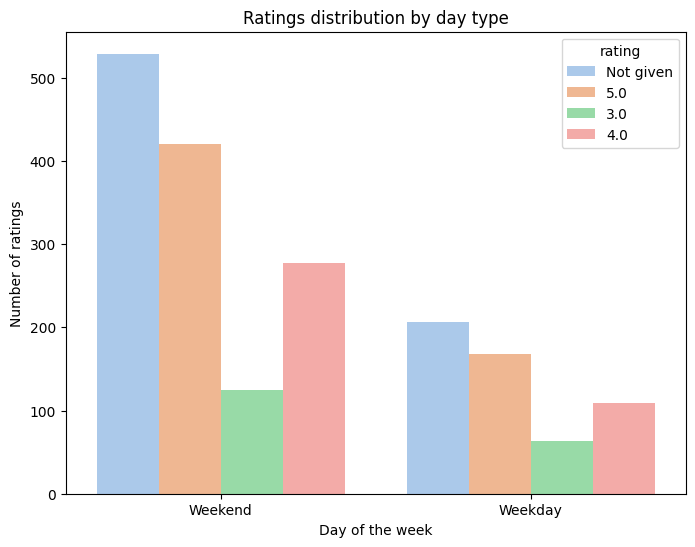

In [ ]:
# plotting the ratings distribution by day type  using bar graphs
plt.figure(figsize=(8, 6))
sns.countplot(data=df,x='day_of_the_week',hue='rating', palette='pastel'
)
plt.title('Ratings distribution by day type')
plt.xlabel('Day of the week')
plt.ylabel('Number of ratings')

plt.show()


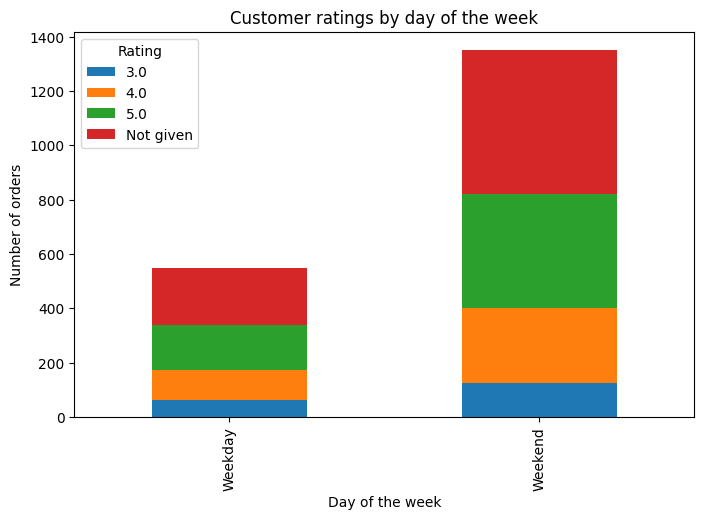

In [ ]:
# crosstab for rating of the day by day of the week
day_rating = pd.crosstab(df['day_of_the_week'], df['rating'])

# plotting as a stacked bar
day_rating.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Customer ratings by day of the week')
plt.ylabel('Number of orders')
plt.xlabel('Day of the week')

plt.legend(title='Rating')
plt.show()

Observation :
We can notice  that large number of orders on weekend are rated 5 , among all the most repeated rate is 5 on both weekends and weekdays , where we have also big number of orders on weekend not rated , also for weekdays

##**13)Does delivery time differ between weekdays and weekends?**

<Axes: xlabel='delivery_time', ylabel='Count'>

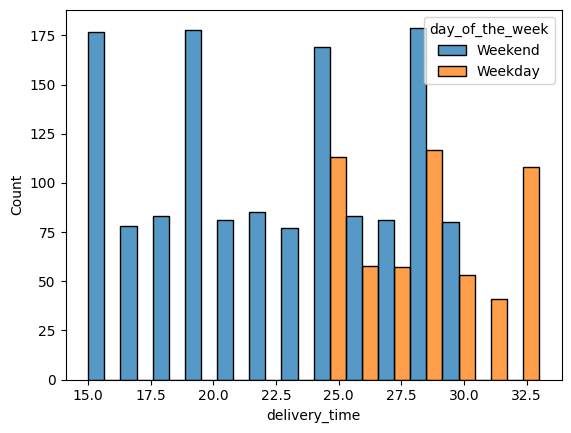

In [ ]:
# plotting the delivery time by day type using histogram with dodge
sns.histplot(data=df, x="delivery_time", hue="day_of_the_week", multiple="dodge", kde=False)




Delivery is faster and more effienet on weekends while weekdays experience delays due to traffic , weekend days are in range of 15-30 minutes while weekdays 25-32.5 minutes

##**14)Are popular restaurants also well-rated?**

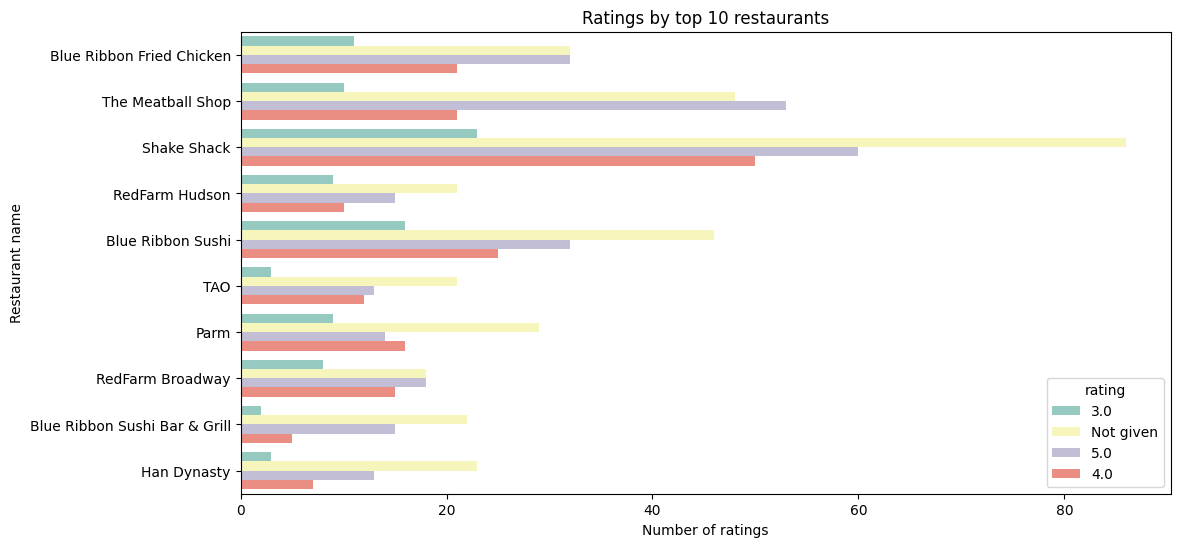

In [ ]:
#filtering top 10 resrutants and then countiing their orders
top_10 = df['restaurant_name'].value_counts().head(10).index
top_df = df[df['restaurant_name'].isin(top_10)]
#plotting ratings of top 10 resturants using bar graph
plt.figure(figsize=(12, 6))
sns.countplot(data=top_df, y='restaurant_name', hue='rating',  palette='Set3'
)
plt.title('Ratings by top 10 restaurants')
plt.xlabel('Number of ratings')
plt.ylabel('Restaurant name')

plt.show()


Observation :
We can notice that for the resturants with high number of ratingss such as Shake Shack and The meatball Shop followed by the Blue Ribbon ones , this actually suggest that generaly customers have positive expeerience with these popular resturants.

##**15)When do top restaurants get most of their traffic?**

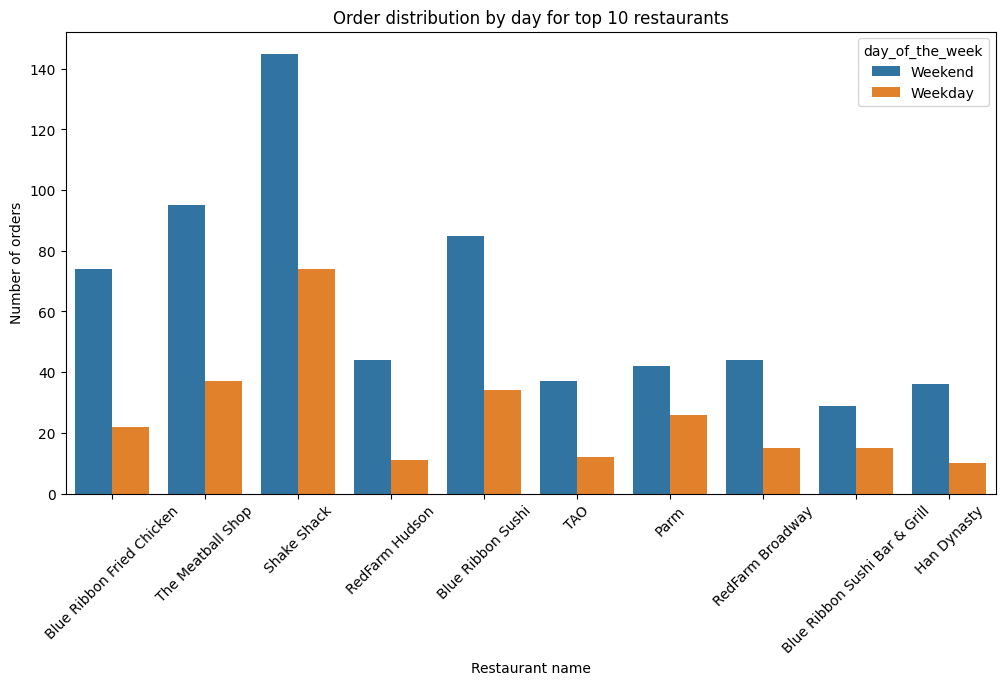

In [ ]:
#taking names of top frequent resturants
top_10_restaurants = df['restaurant_name'].value_counts().head(10).index

#filtering top 10 resurants using bar graph
df_top10 = df[df['restaurant_name'].isin(top_10_restaurants)]

#plotting resturants orders count based on days of the week
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top10, x='restaurant_name', hue='day_of_the_week')

plt.title('Order distribution by day for top 10 restaurants')
plt.xlabel('Restaurant name')
plt.ylabel('Number of orders')
plt.xticks(rotation=45)


plt.show()


Observation: For most of the top 10 restaurants, there is a significantly higher number of orders placed on weekends compared to weekdays. This pattern is consistent with the overall trend observed in the univariate analysis of the "Day of the Week" variable, indicating that weekend demand is higher across these popular establishments.

##**16)Do food preferences change based on the day?**

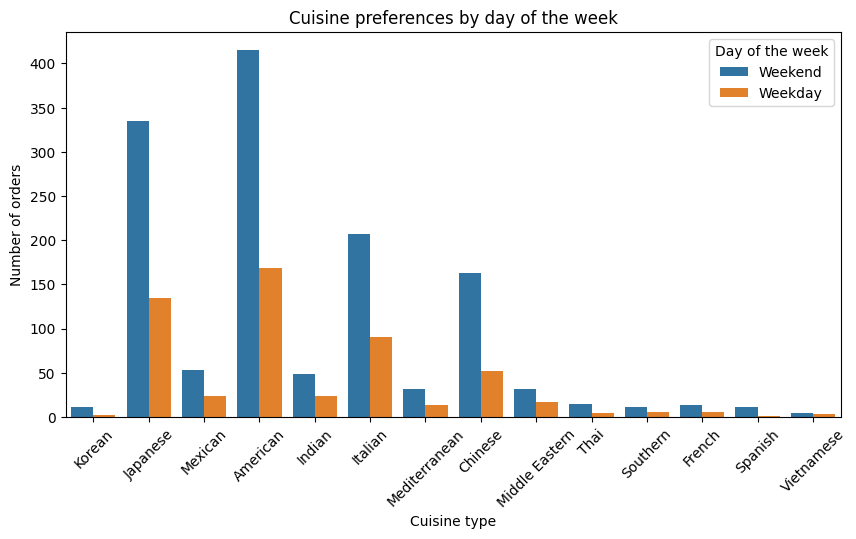

In [ ]:
#plotting cuisine types orders based on day of the week using bar graph
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.title('Cuisine preferences by day of the week')

plt.ylabel('Number of orders')
plt.xlabel('Cuisine type')

plt.xticks(rotation=45)
plt.legend(title='Day of the week')

plt.show()




Observation : We can notice that the distribution of the orders across different cuisine types  varies between weekdays and weekends for most , this shows that  these resturants their dominance is mostly on weekends

##**17)Do higher ratings correlate with higher cost?**

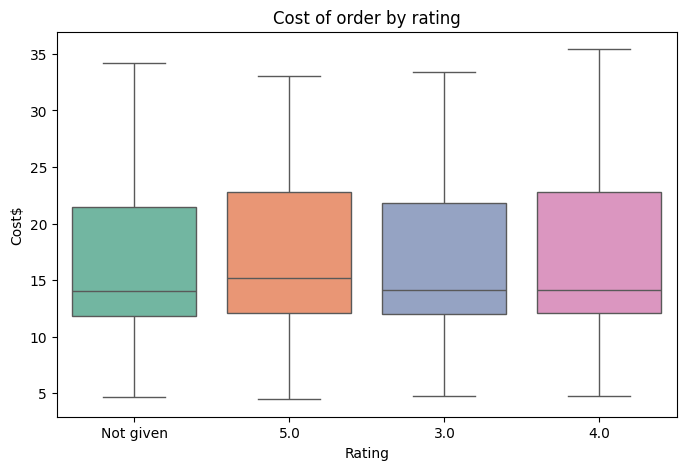

In [ ]:
#plotting cost by rating using boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='rating',y='cost_of_the_order',hue='rating',palette='Set2'
)
plt.title('Cost of order by rating')
plt.xlabel('Rating')
plt.ylabel('Cost$')

plt.legend().remove()
plt.show()



Observation : we can notice that orders with rating 3 have a median dost of 14 dollars,  where 4 and 5 have medians around 14.5 , and 16 dollars repsectively , it shows a slight increase between the cost and the rating  , where the range for the cost for them is between 13 - 22 dollars , there is no clear correlation between high cost and ratings

##**18)Does prep time impact customer rating?**

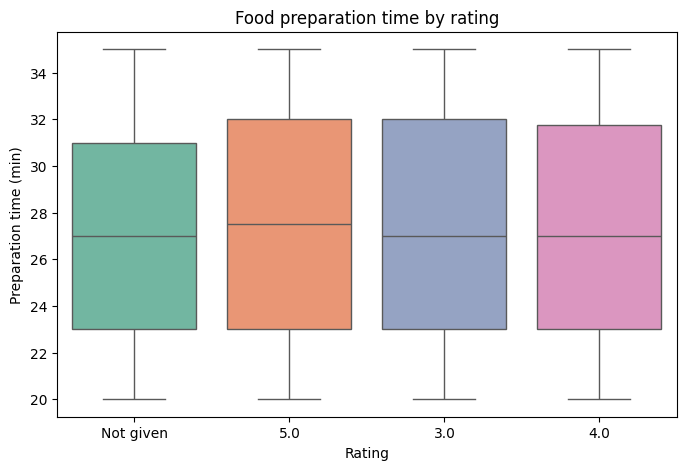

In [ ]:
#plotting food preperation time by ratings using boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(data=df,x='rating',y='food_preparation_time',hue='rating'
,palette='Set2')
plt.title('Food preparation time by rating')

plt.ylabel('Preparation time (min)')
plt.xlabel('Rating')
plt.legend().remove()
plt.show()



Orders with ratings 3,4 and 5 all have similar median food preperation time of around 27 minutes which indicates that preperation time doesnt vary with customer ratings , where the range for the prep time is between 23 to 32 minutes to prepare meals

##**19)Does delivery speed affect ratings?**

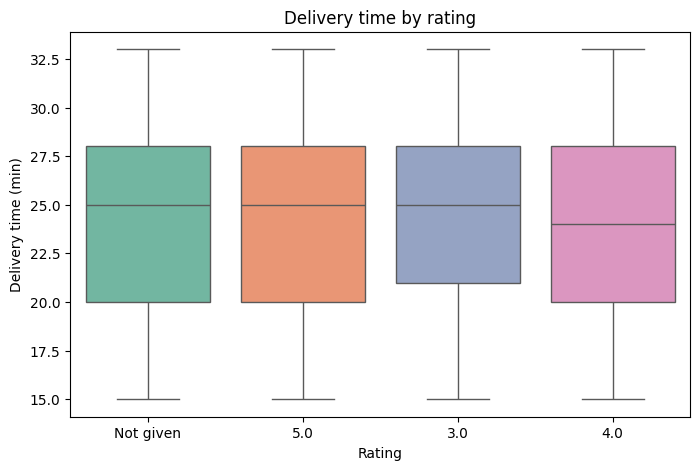

In [ ]:
#plotting delivery time by ratings using boxplots

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='rating', y='delivery_time',hue='rating', palette='Set2')
plt.title('Delivery time by rating')
plt.xlabel('Rating')
plt.ylabel('Delivery time (min)')

plt.legend().remove()
plt.show()




The median delivery time is almsot consistent between different ratings for 25 minute and the spread is between 20 to 27.5 minutes , this sugguests that delivery time doesnt influence customer ratings in the dataset

##**20)Is prep time slower on weekends?**

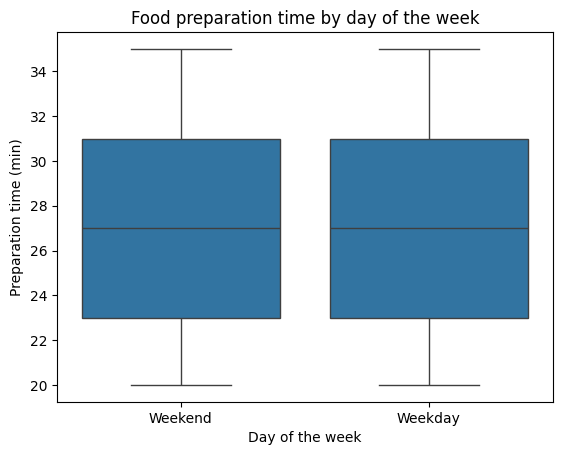

In [ ]:
#plotting food prepreation time by day of the week using  boxplots
sns.boxplot(data=df,x="day_of_the_week",y="food_preparation_time"
)
plt.title("Food preparation time by day of the week")
plt.ylabel("Preparation time (min)")
plt.xlabel("Day of the week")

plt.show()



Food preperation times on weekdays and weeknds are nearly the same , both having a median of 27 minutes and similar range from 20 to 35 minutes , this hows that the kitchen opeartes at a consistent speed regardless of the day.

##**21)Are deliveries faster on weekends?**

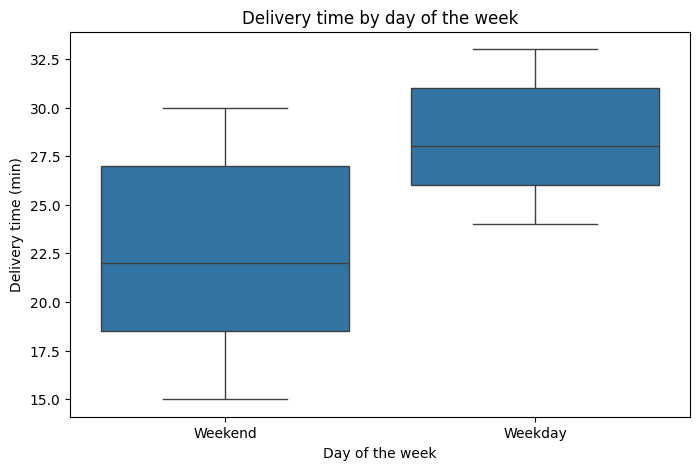

In [ ]:
#plotting delivery time by day of the week using  boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title('Delivery time by day of the week')
plt.ylabel('Delivery time (min)')
plt.xlabel('Day of the week')


plt.show()



Observation : Delivery times are showin that they take longer on the weekdays with a median of 28 minutes , compared to 22 on weekends . this suggets that weekday higher delivery load may be slowing down fulfilment , even though the meal prep time remains consistent , this could inform staffing for optimizing over the weekend

##**22)Does day-based delivery speed affect ratings?**

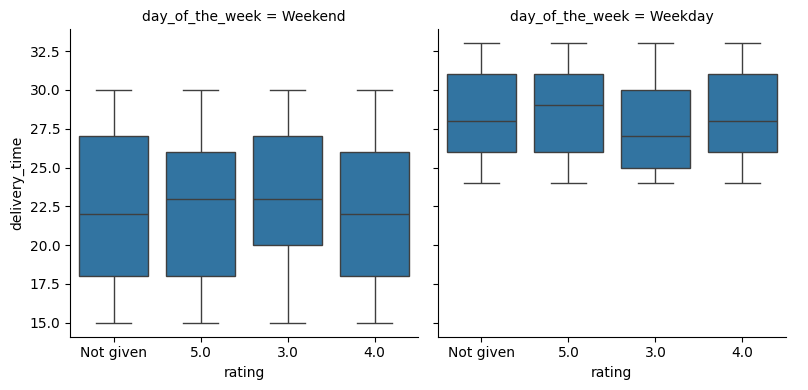

In [ ]:
#plotting a facet grid for the delivery time across ratings for weekday and weeknd
sns.catplot(data=df,x="rating", y="delivery_time", col="day_of_the_week",kind="box",
    height=4
)




the graph shows that american and japanese cuisine take more time to prep food more than italian and chinese in resturant.

##**23)Does cost vary by rating and day?**

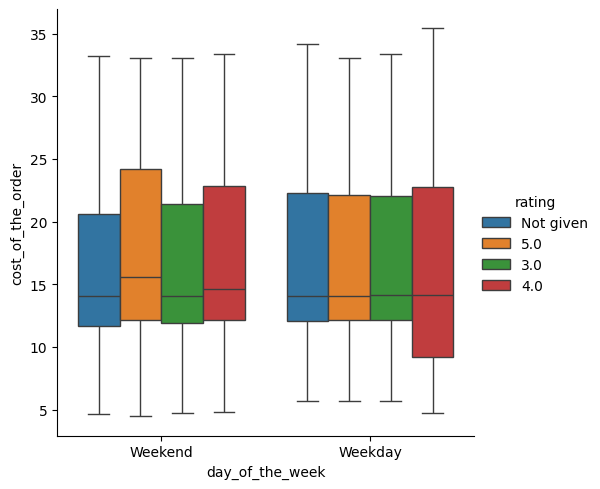

In [ ]:
#plotting the cost  by the ratings for weekday and weekend
sns.catplot(data=df,x="day_of_the_week", y="cost_of_the_order",hue="rating", kind="box")




this plot shows that the order cost remains consistent for different days with median of 13-15 , this shows that there is not clear link between cost and rating , pricing is table between weekdays and weekends

##**24)Are there strong relationships between time, rating, or cost?**

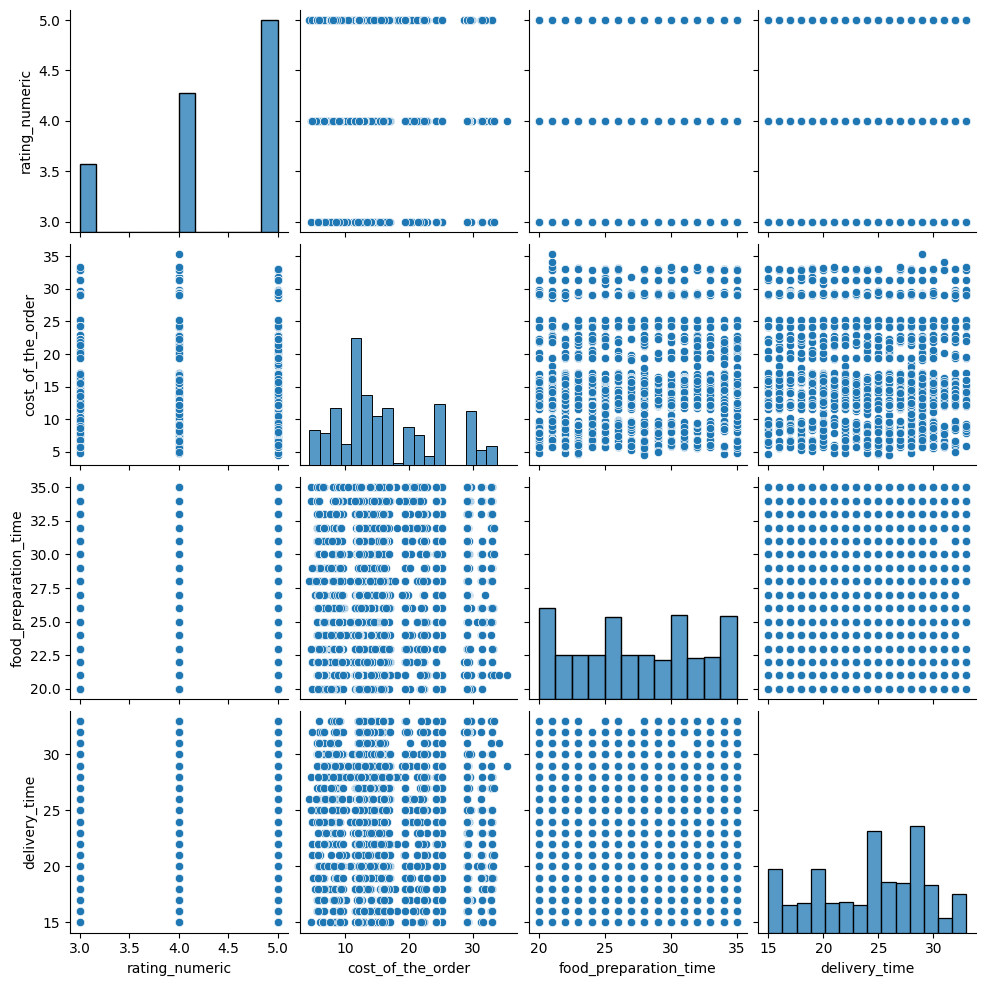

In [ ]:
# making sure rating is numeric
df['rating_numeric'] = pd.to_numeric(df['rating'], errors='coerce')

# numeric paramters defined
numeric_cols = ['rating_numeric', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']

# plot a pairplot scatter for all of the combinations
sns.pairplot(df[numeric_cols], corner=False)

plt.show()

There is no strong linear relationship between any pair of numerical variables. Ratings are clearly discrete, forming vertical bands with no visible correlation to cost, preparation, or delivery time. The cost of order is right-skewed, showing more low-cost orders, while food preparation time and delivery time are more evenly distributed. This suggests that customer satisfaction (ratings) is not directly driven by cost or time, and that each metric varies independently.

We can notice there is no strong linear relationship between any pair of numerical variables , rating is discrete , forming vertical bands , and no clear correlation to cost , prepearion or deilvefy time , the ost of order is

##**25)Are numerical features strongly correlated?**

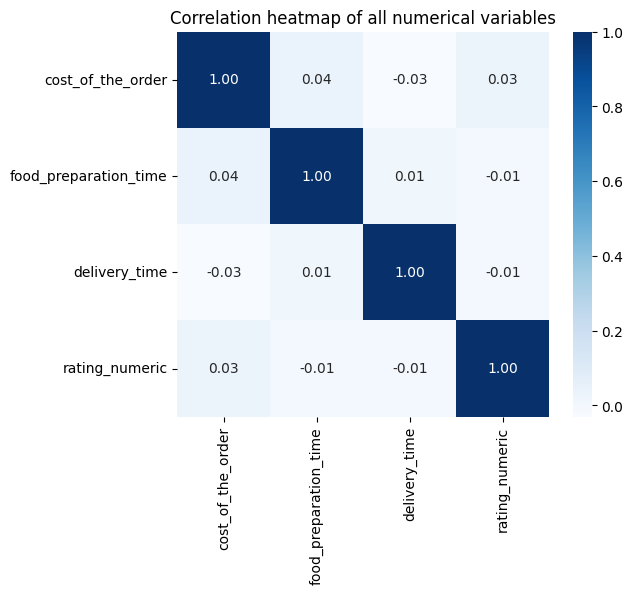

In [ ]:
#defining the columns , creating correlation matrix for them
numeric_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating_numeric']
corr_matrix = df[numeric_cols].corr()

# plotting a heatmap with corr_matrix value round to 2 float
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation heatmap of all numerical variables')

plt.show()


Observation: The heatmap visually represents the correlation coefficients between the numerical variables. The color intensity and the values displayed indicate the strength and direction of the linear relationship. Observing the heatmap, we can see that the correlation coefficients between most pairs of numerical variables are close to zero. This reinforces the observation from the scatter matrix that there are no strong linear correlations between the numerical variables in the dataset. For instance, the correlation between food_preparation_time and delivery_time is very low, as is the correlation between cost_of_the_order and rating_numeric.

##**26)How does customer satisfaction vary across different cuisines and days of the week?**

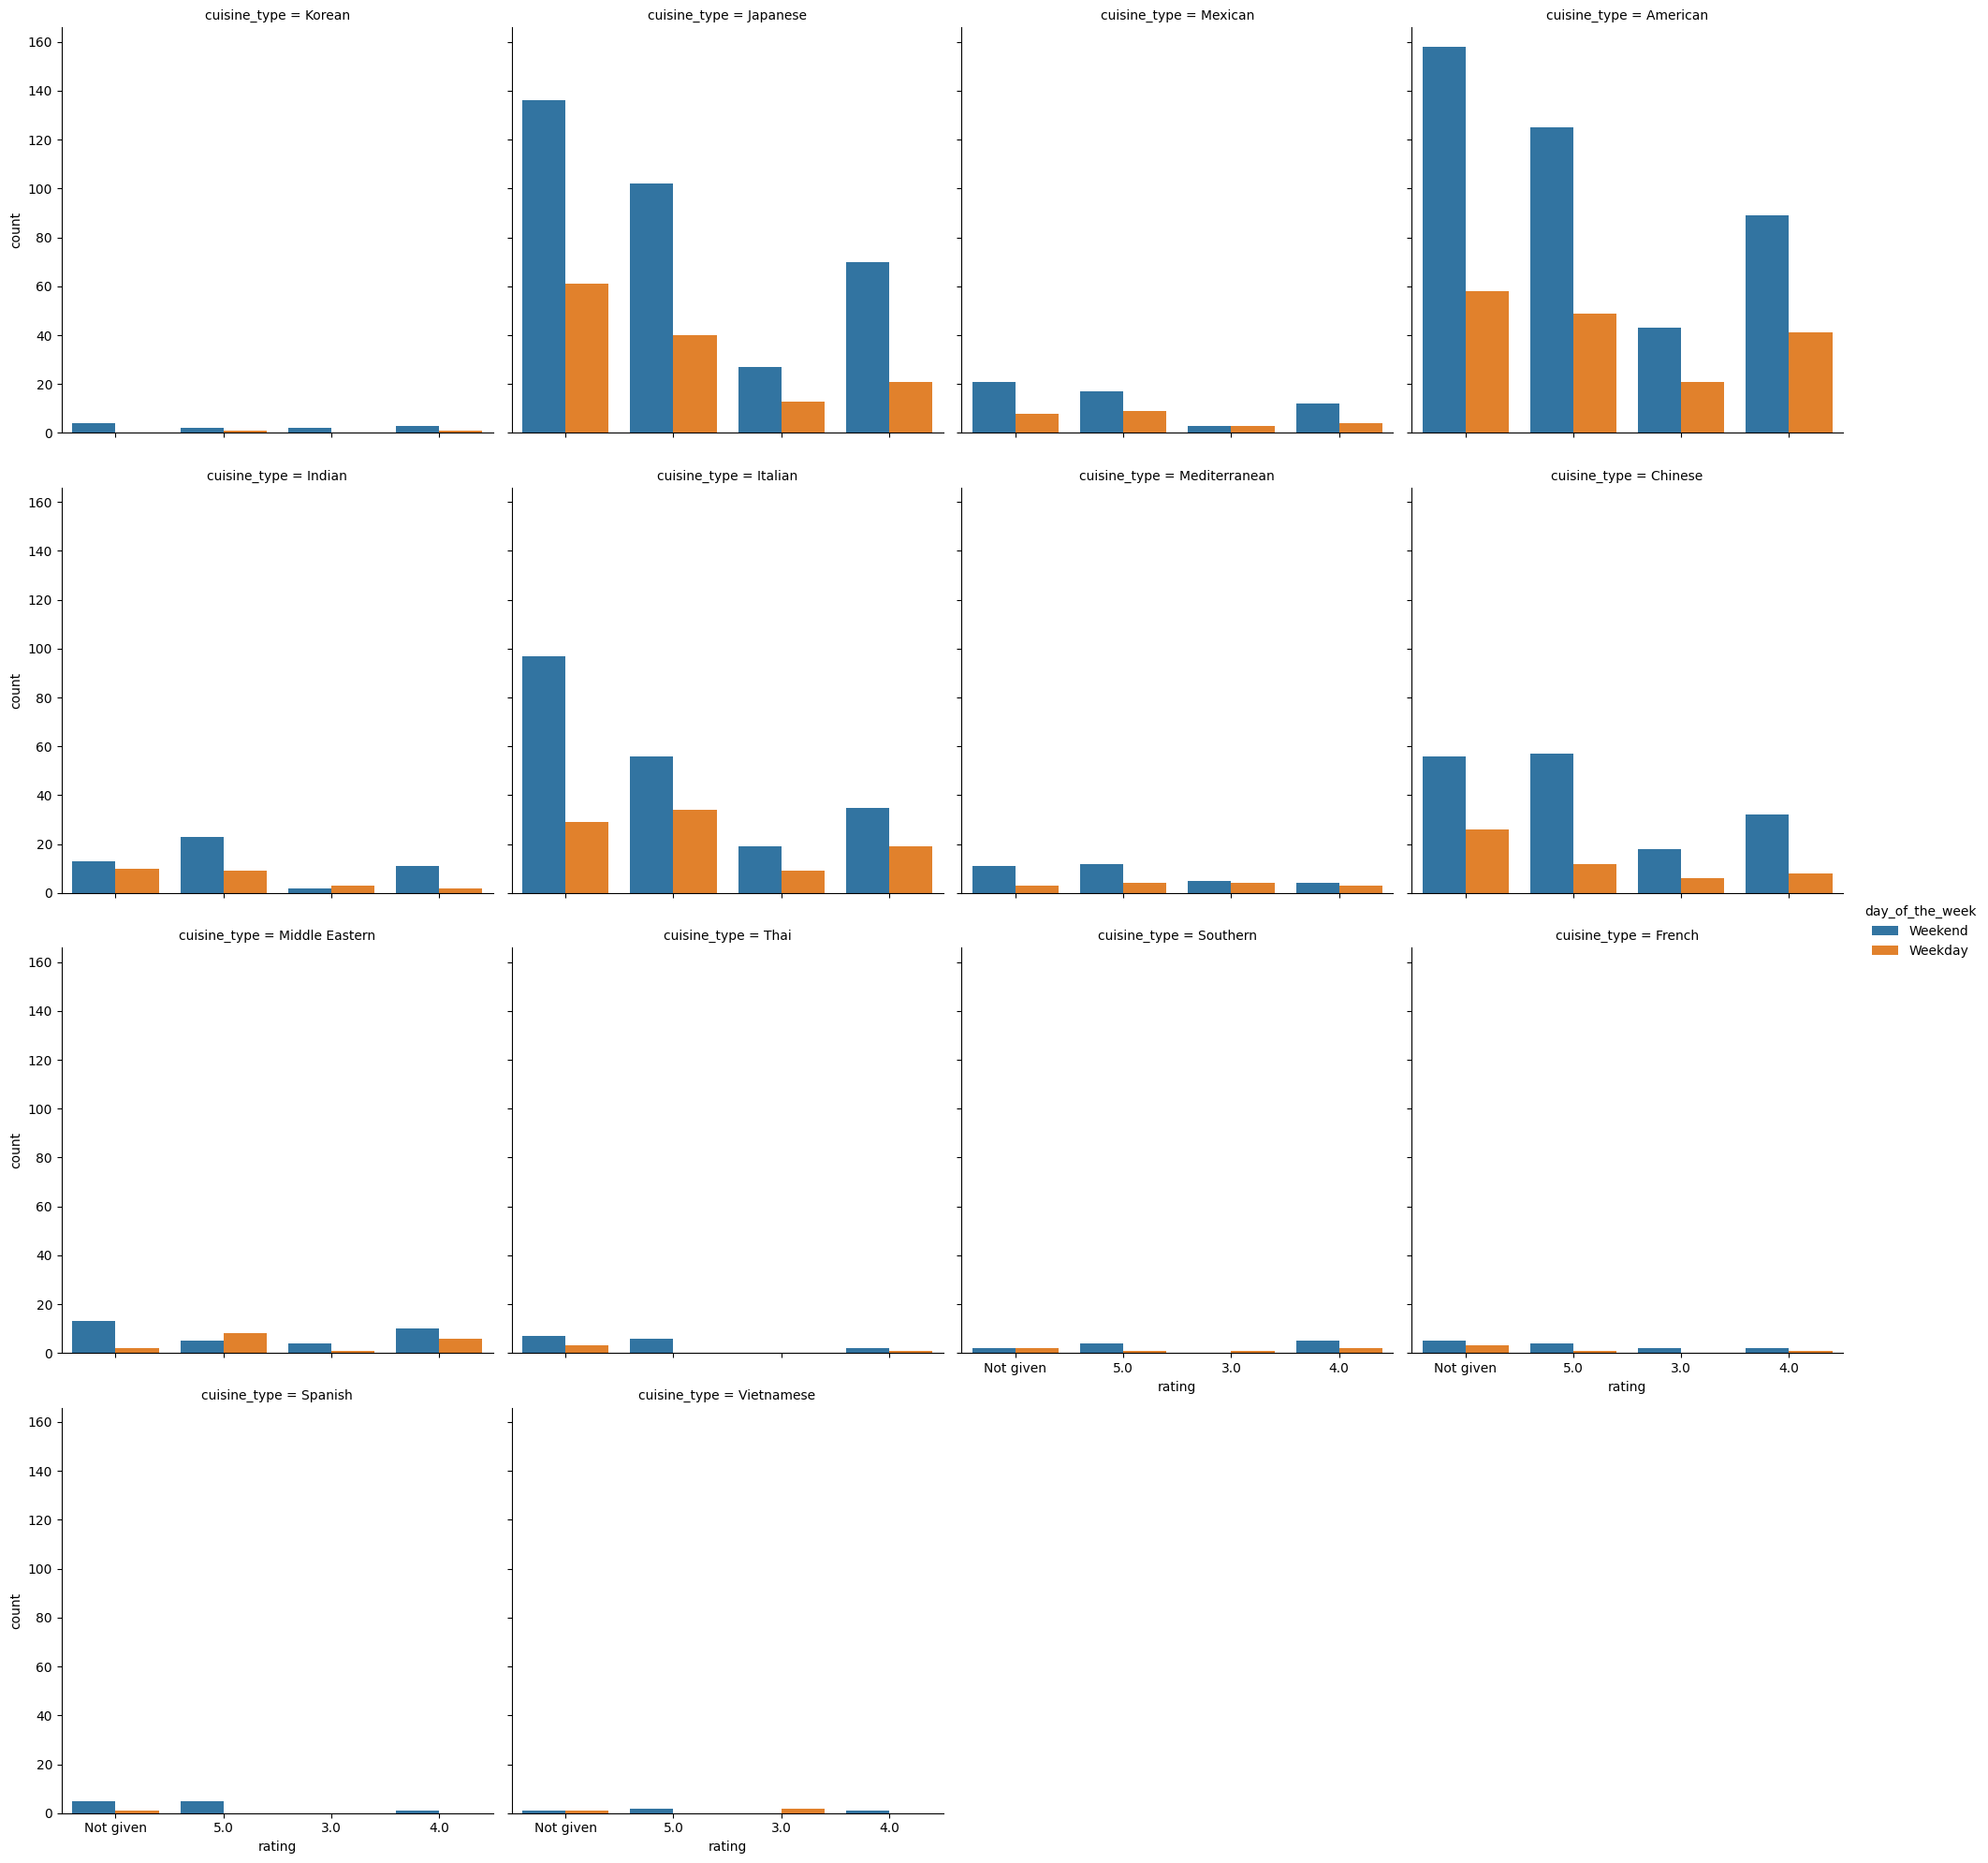

In [ ]:
# facet grid for multiple cuisines 4 per horizantal
sns.catplot(data=df,x="rating",hue="day_of_the_week",col="cuisine_type",kind="count",col_wrap=4,)




Observation :  this facet grid shows american , italian , japanese and chinese domiante weekend orders with a strong concentration of 5 ratings , and high volume of not given shows where there is a feedback gap.
on the other hand weekdays orders are lower across al cuisines


# **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# we makde a copy o the filtered data as not given and converted it to numerical values
filtered = df[df['rating'] != 'Not given'].copy()
filtered['rating'] = pd.to_numeric(filtered['rating'], errors='coerce')


I converted the rating column from object (string) to numeric values using pd.to_numeric() so I could accurately calculate numerical operations like mean; without this, the ratings would stay as text and mathematical functions wouldn’t work.

In [ ]:
# convert rating to numeric, coercing 'Not given' to NaN
df['rating_numeric'] = pd.to_numeric(df['rating'], errors='coerce')

# group by restaurant_name and calculate count and mean of numeric ratings
qualified = df.groupby('restaurant_name')['rating_numeric'].agg(['count', 'mean'])

# we filter restaurants with more than 50 ratings and an average rating > 4
qualified = qualified[(qualified['count'] > 50) & (qualified['mean'] > 4)]

# result
print(qualified)


                           count  mean
restaurant_name                       
Blue Ribbon Fried Chicken     64  4.33
Blue Ribbon Sushi             73  4.22
Shake Shack                  133  4.28
The Meatball Shop             84  4.51


#### Observations: The restaurants Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop qualify for the promotional offer as they each have over 50 ratings and an average rating greater than 4.


# **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# we created a function to take 25% for orders cost greater than 20 dollars and 15% for orders greater than 5 dollars , else is zero
def commision_calculator(cost):
    if cost > 20 :
      return  cost * 0.25
    elif cost > 5  :
      return    cost * 0.15
    else:
      return 0

# we apply the function to calcualte the comission
df['commission'] = df['cost_of_the_order'].apply(commision_calculator)

# summing the revenue
net_revenue = df['commission'].sum()

# print the sum
print("The total net revenue from commissions: $", round(net_revenue, 2))

The total net revenue from commissions: $ 6166.3


#### Observations:
the company’s total commission revenue by applying two commission rates:
1)25% for orders over $20.

2)15% for orders over $5.

 Using calcualte_comission(cost) we assigned the correct commission to each order. Summing these commissions gave a total net revenue of $6166.3, which reflects the total amount the company earns from all processed orders.

# **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:

# We use simple addition to sum the total time of delivery and preperation time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
# we get the number of orders using len
total_orders = len(df)
# we filter for orders where its total time is mroe than 60
orders_over_60 = df[df['total_time'] > 60]
# we calculate the percentage by dividing the number of orders higher than 60 by the total number of orders
percentage = (len(orders_over_60) / total_orders) * 100
print(round(percentage, 2))

10.54


#### Observations:we calculated the combined total of preparation and delivery time for each order. Then, we calculated the percentage of orders that took more than 60 minutes. the result shows that 10.54% of all orders take more than one hour, providing insight into how often the company can take longer delivery times.


# **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# we group the delivery time based on the day of the week 2 groups ( weekdays and weekends)
mean_time = df.groupby('day_of_the_week')['delivery_time'].mean()
print(mean_time)


day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64



it takes an average of 28.34 mins to delivery orders on weekdays , where it takes 22.47 mins in weekends , this shows that deliverries are faster on weekends compared to weekdays.

### Conclusion and Recommendations

# **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

##Conclusions:


**From Resturants Demand Perspective**
The analysis shows that only a small group of resturants dominate the customer demand , like shake shack alone has over 200 orders , together Meatball shop and Blue Ribbon Sushi, Blue ribbon Friend chicken and Parm are the top 5 resrutants that account for over 25% of all 1989 orders , similarly we can notice that the american cusine leads with almost 600 orders , followed by japanese 335 orders , and the italian 207 orders , this indicates clear customer perferences , on the other hand cusines like vietnamese korean and spanich recieved less than 50 orders which suggests a low demand

**From Customer Satisfcation Perspective**

There is a significant feedbak gap , 736 out of 1898 orders are "Not Given" which represnets 38.78% of the ratings , and 77% percent of them is concertanted in a small group of resturants , this clustered or non random pattern shows that soem resturants consistently are failing to capture customer feedback , on the other hand for rated orders the most frequent rating is 5.0 followed by 4 and 3 , indicating that genereally there is high satistfaction ,, but the missing data weakens this confidence of conclusion , adtionally there no stron relation between costand rating , we noticed that the median costof 3,4,5 respectively is 13,14.5,16 dollars.

**From Business Ops Perspective**

Operationally , we can notice the the platform performs well , the median food prep time is 27.3 minutes with a tight IQR between 21 and 31 minutes , the delivery time is 25 minutes with IQR 20-28 minutes .
Only 10.54% of total orders took more than 60 minutes from placement to delivery , however the delivery times are signifcantly affected by the day where average delivery time for weekdays is 28.34 minutes compared to 22.47 minutes on weekends , even thou prep times remain consistent across both , this indicates a logistical inefficiency during the weekday.





##Recommendations:




**From Resturants Demand Perspective**
Recommending to double down on high performing resturants and cuisines , foodhub should design a priority partenrship with top 5 resturants each with 100+orders and dominant cusines like american , japanese .
these partnerships can include loyality rewards , exclusive deals  and reduced delivery time , for unrrrepresented cuisines like vietnamese and korean , we need to test targeted promotions or banner replacement tot assess potential demand and increase diversity of offerings.


**From Customer Satisfcation Perspective**

Recomending to fix the feedback blind spot , because the 38.78 missing rates especially the 567 clustered missing ratings shows a critical feedback quality issue , the foodhub should introduce post order nudge for every order to leave feedback by the customer , we can offer small reward like 5% off the next order or addign quick rating form inside the app . Focusing on the resturants with most missing ratings can help collect more feedback and also spot resturants not performing well.

**From Business Ops Perspective**
Recommending to improve the delivery speed and optimize revenue , to adress the 6 minutes gap in delivery speed between weekdays and weekends , foodhub has to reallocate driver availabity on weekdays , particuarly during lunch and dinner rushes , given that orders over 20 dollars yield a 25% comission and 15% otherwise . promotions that encourage basket sizes over 20 dollars , like family combos  or free delivery for over 18 dollars order , can increase profitability . the current stage already generated 6166.3 in revenue , but pushing more orders into the high margin can significantly boost this figure.


In [ ]:
# drive mount
from google.colab import drive
drive.mount('/content/drive')

# copying the notebook saved on drive
!cp "/content/drive/My Drive/Foodhub/Foodhub Project" "Foodhub_Project_Drive.ipynb"

# converting notebook
!jupyter nbconvert --to html "Foodhub_Project_Drive.ipynb"

# downloading html verion
from google.colab import files
files.download("Foodhub_Project_Drive.html")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook Foodhub_Project_Drive.ipynb to html
[NbConvertApp] Writing 454341 bytes to Foodhub_Project_Drive.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>